In [9]:
## upload the IMI_BigData_Challenge Folder in the Colab Notebooks found in your G=drive. Then it will be easy to access and do stuff. 
from google.colab import drive
drive.mount('/content/drive')
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
path='/content/drive/MyDrive/Colab Notebooks/IMI_BigData_Challenge/Raw data files'
path_edge=os.path.join(path,'UofT_edges.csv')
path_nodes=os.path.join(path,'UofT_nodes.csv')
path_occupation_risk=os.path.join(path,'UofT_occupation_risk.csv')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date

In [11]:
df_edge=pd.read_csv(path_edge)

In [8]:
df_edge.head()

,source,target,emt
0,983859.0,544485.0,503.807815
1,605618.0,362627.0,5157.568486
2,323189.0,118238.0,498.628481
3,919153.0,983859.0,401.962668
4,995748.0,983859.0,5095.458776


In [12]:
df_occupation=pd.read_csv(path_occupation_risk)

In [13]:
df_occupation.head()

,code,occupation_risk
0,0,Low
1,1,High
2,2,Low
3,3,Low
4,4,Low


In [14]:
date_col=['BIRTH_DT','CUST_ADD_DT']

In [16]:
df=pd.read_csv(path_nodes,parse_dates=date_col)

In [17]:
df.head()

,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,NAME,GENDER,CUSTOMER_ID
0,1981-09-01,2007-07-05,89.0,1,1,0.0,2577.785,2.0,2851.663,7.0,70774.0,62.0,24244.0,35.0,Low,Low,low,"Young, Marie Mildren Coleman",Female,935382.0
1,1994-02-21,2019-05-19,89.0,1,1,0.0,3035.502,2.0,4805.997,15.0,282929.0,76.0,196439.0,152.0,Low,Low,low,Mark Stupar Lecy,Male,2305.0
2,1962-11-16,2011-08-02,89.0,1,1,0.0,1617.571,1.0,3482.809,11.0,7632.0,6.0,33598.0,20.0,Low,Low,low,Dean Glasper Wendel Reeves,Male,472403.0
3,1998-06-20,2001-08-15,89.0,1,1,0.0,3587.042,5.0,1940.943,8.0,149253.0,71.0,105896.0,238.0,Low,Low,low,"Hulsey, Linda Rauth",Female,227994.0
4,1942-01-24,2012-10-28,89.0,1,1,0.0,1725.524,2.0,13197.169,43.0,92318.0,96.0,187403.0,180.0,Low,Low,low,Carolyn Washington Roberts,Female,418265.0


#Check size of data

In [18]:
print(df.shape)
print(df_edge.shape)
print(df_occupation.shape)

(1000000, 20)
(466233, 3)
(841, 2)


Key points/Ideas 

1. there are 3 csv files. Nodes contains the main data 
2. Edges.csv contains amount being sent. Perform join with customer ID. Question here lies on what to do about missing data for other customers ?? 
3. occupation risk contains the occupation code of customer along with the risk associated with it perform join using risk code. 

Baseline- Simple model using any of the multiclassification algo ( To be discussed) 

Main model- Deep Learning based on Graph Neural Networks ?? ( Discuss) 

Any other ideas to discuss.. 




## Basic Preprocessing
1. Check on missing data.
2. Covert categorical columns to numerical columns. 
3. Check on Class Imbalance

#Check Missing Data

In [19]:
df.isnull().sum()

BIRTH_DT                     0
CUST_ADD_DT               4178
OCPTN_NM                  6384
RES_CNTRY_CA                 0
CNTRY_OF_INCOME_CA           0
PEP_FL                       0
CASH_SUM_IN                  0
CASH_CNT_IN                  0
CASH_SUM_OUT                 0
CASH_CNT_OUT                 0
WIRES_SUM_IN                 0
WIRES_CNT_IN                 0
WIRES_SUM_OUT                0
WIRES_CNT_OUT                0
COUNTRY_RISK_INCOME          0
COUNTRY_RISK_RESIDENCY       0
RISK                         0
NAME                       660
GENDER                     628
CUSTOMER_ID                  0
dtype: int64

Missing data is present. 
1. We can fill dates, risk code. Names will be difficult to fill. Discuss

In [20]:
df_edge.isnull().sum()

source    0
target    0
emt       0
dtype: int64

In [21]:
df_occupation.isnull().sum()

code               0
occupation_risk    0
dtype: int64

No Missing data on other two dataframes.

In [ ]:
df.dtypes

BIRTH_DT                  datetime64[ns]
CUST_ADD_DT               datetime64[ns]
OCPTN_NM                         float64
RES_CNTRY_CA                       int64
CNTRY_OF_INCOME_CA                 int64
PEP_FL                           float64
CASH_SUM_IN                      float64
CASH_CNT_IN                      float64
CASH_SUM_OUT                     float64
CASH_CNT_OUT                     float64
WIRES_SUM_IN                     float64
WIRES_CNT_IN                     float64
WIRES_SUM_OUT                    float64
WIRES_CNT_OUT                    float64
COUNTRY_RISK_INCOME               object
COUNTRY_RISK_RESIDENCY            object
RISK                              object
NAME                              object
GENDER                            object
CUSTOMER_ID                      float64
dtype: object

In [ ]:
df.COUNTRY_RISK_INCOME.value_counts()

Low         996546
High          2841
Moderate       613
Name: COUNTRY_RISK_INCOME, dtype: int64

Low         990109
High          9200
Moderate       691
Name: COUNTRY_RISK_RESIDENCY, dtype: int64


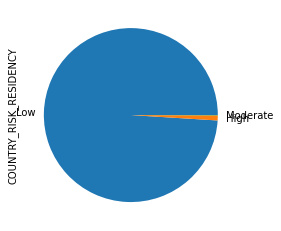

In [ ]:
risk_residency=df.COUNTRY_RISK_RESIDENCY.value_counts()
print(risk_residency)
risk_residency.plot.pie()

Female    548684
Male      450688
Name: GENDER, dtype: int64


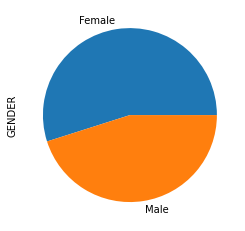

In [ ]:
g_count=df.GENDER.value_counts()
print(g_count)
g_count.plot.pie()

low       600000
medium    350000
high       50000
Name: RISK, dtype: int64


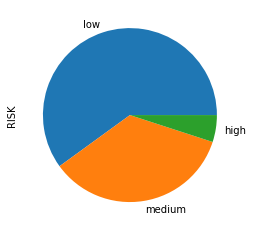

In [ ]:
risk_count=df.RISK.value_counts()
print(risk_count)
risk_count.plot.pie()

## Class Imbalance

In [ ]:
print(risk_count['low']/df.shape[0]*100)
print(risk_count['medium']/df.shape[0]*100)
print(risk_count['high']/df.shape[0]*100)

60.0
35.0
5.0


only 5% is high and significant class imbalance is present given the fact that we we have to predict "high" customers. 

To be discussed 
1. Downsample to make equal distribution 
2. Loss function to penalize more on misclassifying "high" class 
3. Ensembling methods (Boosting and Stuff) 
4. More methods

I think best is everyone taking on approach and performing multiple expermiements and compare who which one gets the best score. 


# High level EDA and Feature Engineering Ideas 

1. Do males commit more high risk fraud then females ? Because gender plays a role in crime in general ?
2. What about Age ? Do people under certain age group commit more fraud than others ? E.g. Between 20-40 years etc
3. Correlation between high risk customers and duration of them being customers ? 
4. Typical threshold of money transfer or pattern of transfer to customers ? Use edges table for this. (Have to see) 

Bunch of other ideas are there in my mind, will keep adding as we progress. Don't know which will work which will not. 

# Basic EDA

1. Risk vs Gender

In [ ]:
df.groupby(['GENDER','RISK'])['GENDER'].count()

GENDER  RISK  
Female  high       27629
        low       329484
        medium    191571
Male    high       22329
        low       270125
        medium    158234
Name: GENDER, dtype: int64

ouuu females are a higher risk customers than males. so we should keep gender columns and convert Male-0 and Feamle-1 or whatever number you want to fix

Age vs Risk 

In [ ]:
curr_year=2023 ##submission is on next year

In [ ]:
year=df.BIRTH_DT.dt.year

In [ ]:
year.max()

2019

In [ ]:
year.min()

1880

In [ ]:
df['Age']=2023-df.BIRTH_DT.dt.year

In [ ]:
res=df.groupby(['Age','RISK']).size().reset_index(name='count').sort_values(['count'], ascending=False)
res

,Age,RISK,count
118,47,low,12238
127,50,low,12237
115,46,low,12085
112,45,low,11979
109,44,low,11942
...,...,...,...
319,136,low,2
315,127,low,1
317,130,low,1
320,139,low,1


In [ ]:
high_count=res[res['RISK']=='high']
high_count

,Age,RISK,count
135,53,high,1262
129,51,high,1240
126,50,high,1219
117,47,high,1219
123,49,high,1214
...,...,...,...
267,97,high,24
276,100,high,20
273,99,high,17
6,10,high,14


1. We should check with more correlations to find age vs risk vs contry..etc to add a featured engineered columns. 


In [ ]:
low_count=res[res['RISK']=='low']
low_count

,Age,RISK,count
118,47,low,12238
127,50,low,12237
115,46,low,12085
112,45,low,11979
109,44,low,11942
...,...,...,...
319,136,low,2
315,127,low,1
317,130,low,1
320,139,low,1


date when joined bank (Age) vs risk 

In [ ]:
cust_year=df.CUST_ADD_DT.dt.year

In [ ]:
df['account_age']=2023-cust_year

In [ ]:
df['account_age'].min()

1.0

In [ ]:
df['account_age'].max()

74.0

In [ ]:
res=df.groupby(['account_age','RISK']).size().reset_index(name='count').sort_values(['count'], ascending=False)
res

,account_age,RISK,count
46,16.0,low,23028
43,15.0,low,22960
49,17.0,low,22936
52,18.0,low,22757
40,14.0,low,22698
...,...,...,...
172,65.0,low,2
176,67.0,low,1
180,72.0,medium,1
181,73.0,medium,1


In [ ]:
high_count=res[res['RISK']=='high']
high_count

,account_age,RISK,count
42,15.0,high,2143
48,17.0,high,2111
51,18.0,high,2102
45,16.0,high,2083
36,13.0,high,2067
33,12.0,high,2066
39,14.0,high,2022
30,11.0,high,2011
27,10.0,high,1933
54,19.0,high,1925


Accounts between 2-27 show a high rate of risk. Again need to map accordingly. Could be based on multiple conditions which we need to find out. 

In [ ]:
low_count=res[res['RISK']=='low']
low_count

,account_age,RISK,count
46,16.0,low,23028
43,15.0,low,22960
49,17.0,low,22936
52,18.0,low,22757
40,14.0,low,22698
...,...,...,...
168,63.0,low,4
170,64.0,low,4
174,66.0,low,3
172,65.0,low,2


In [ ]:
med_count=res[res['RISK']=='medium']
med_count

,account_age,RISK,count
56,19.0,medium,12836
50,17.0,medium,12744
53,18.0,medium,12741
59,20.0,medium,12594
62,21.0,medium,12489
...,...,...,...
178,68.0,medium,2
179,69.0,medium,2
180,72.0,medium,1
181,73.0,medium,1


## Check with cash and see.. 

In [ ]:
df_test=df.groupby(['RISK'])